# Theory
The state prepared on the 0th qubit:
$$
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi_0}=\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}
$$

What will be measured:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{0}{\psi_0}\right|^2=\cos^2\frac{\theta}{2}\\
\beta=\left|\braket{1}{\psi_0}\right|^2=\sin^2\frac{\theta}{2}
$$


The state prepared on all 3 qubits:
\begin{align}
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi}=\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\otimes\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})=\\
=\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}-\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}-\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}+\cos\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}-\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}-\cos\frac{\theta}{2}\ket{1}\right)
\end{align}

Therefore:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{000}{\psi}\right|^2+\left|\braket{110}{\psi}\right|^2+\left|\braket{011}{\psi}\right|^2+\left|\braket{101}{\psi}\right|^2\\
\beta=\left|\braket{001}{\psi}\right|^2+\left|\braket{111}{\psi}\right|^2+\left|\braket{010}{\psi}\right|^2+\left|\braket{100}{\psi}\right|^2
$$


Every job consists of 20 circuits: 1 test circuit (prepare $|\psi_0\rangle$ and measure) and 1 teleportation circuit (prepare $|\psi\rangle$, teleport and measure) for 10 different degrees $\theta \in [0;\pi]$

# Preparing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../Teleportation/teleportation_data.csv')

Creating data frames with data in long format, for easy plotting with ggplot:

In [3]:
long_data=pd.melt(data,
                 id_vars=['backend','theta','index','date'])
long_data['job']=long_data['variable'].map({
    'alpha':'teleport',
    'beta':'teleport',
    'alpha_theory':'theory',
    'beta_theory':'theory',
    'alpha_test':'test',
    'beta_test':'test'
})
long_data['obs']=long_data['variable'].map({
    'alpha':'alpha',
    'beta':'beta',
    'alpha_theory':'alpha',
    'beta_theory':'beta',
    'alpha_test':'alpha',
    'beta_test':'beta',
})
long_data=long_data.drop('variable',1)
long_data.head()

,backend,theta,index,date,value,job,obs
0,ibmqx4,0.000000,0,2018-07-12T10:29:42.461Z,0.909180,teleport,alpha
1,ibmqx4,0.349066,0,2018-07-12T10:29:42.677Z,0.886719,teleport,alpha
2,ibmqx4,0.698132,0,2018-07-12T10:29:42.844Z,0.828125,teleport,alpha
3,ibmqx4,1.047198,0,2018-07-12T10:29:43.041Z,0.706055,teleport,alpha
4,ibmqx4,1.396263,0,2018-07-12T10:29:43.243Z,0.606445,teleport,alpha


In [4]:
obs_data=pd.pivot_table(long_data,index=['index','backend','theta','obs','date'],columns='job',values=['value'])
obs_data.columns=[x[1] for x in list(obs_data)]
obs_data=obs_data.reset_index()

obs_data.head()

,index,backend,theta,obs,date,teleport,test,theory
0,0,ibmqx4,0.000000,alpha,2018-07-12T10:29:42.461Z,0.909180,0.989258,1.000000
1,0,ibmqx4,0.000000,beta,2018-07-12T10:29:42.461Z,0.090820,0.010742,0.000000
2,0,ibmqx4,0.349066,alpha,2018-07-12T10:29:42.677Z,0.886719,0.973633,0.969846
3,0,ibmqx4,0.349066,beta,2018-07-12T10:29:42.677Z,0.113281,0.026367,0.030154
4,0,ibmqx4,0.698132,alpha,2018-07-12T10:29:42.844Z,0.828125,0.878906,0.883022


In [5]:
theory_data=pd.DataFrame({
    'theta':np.linspace(0,np.pi,50),
    'backend':'theory','index':-1,'variable':'alpha',
    'value':np.cos(np.linspace(0,np.pi,50)/2)**2}).append(
    pd.DataFrame({
    'theta':np.linspace(0,np.pi,50),
    'backend':'theory','index':-1,'variable':'beta',
    'value':np.sin(np.linspace(0,np.pi,50)/2)**2}))


# Visualization
Every line represents one job.

In [6]:
from ggplot import *
#from ggplot.stats.stat_function import stat_function
#from rpy2.rinterface import parse

C:\Users\Alicja\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Alicja\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


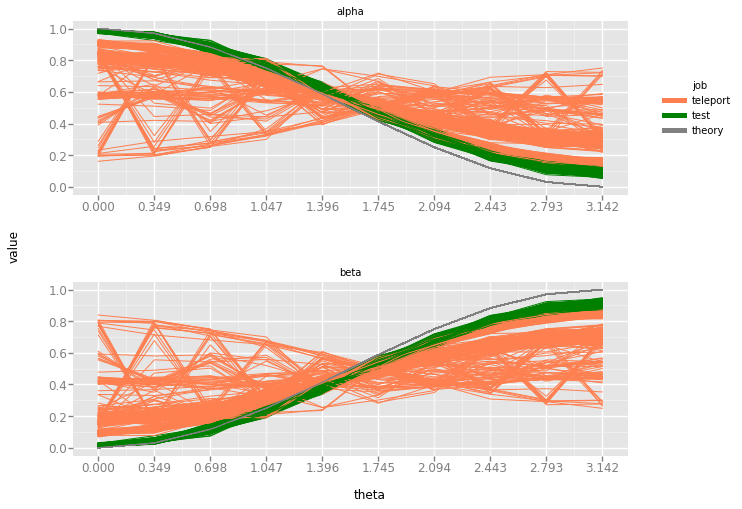

<ggplot: (96556050899)>

In [7]:
ggplot(aes(x='theta',y='value',group='index',colour='job'),data=long_data)+\
    geom_line()+\
    scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)),name='theta')+ \
    scale_color_manual(values=['coral','green','gray'])+\
    facet_wrap("obs")

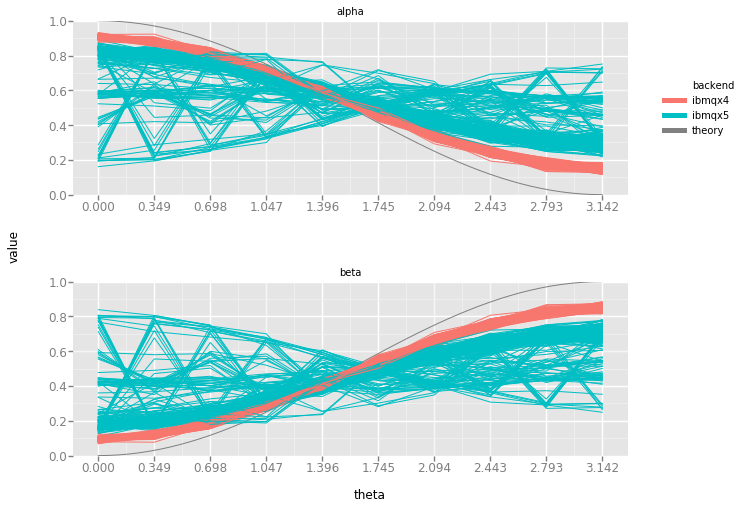

<ggplot: (96558429967)>

In [8]:
ggplot(aes(x='theta',y='value',group='index',colour='backend'),
       data=pd.melt(data,id_vars=['backend','theta','index'],value_vars=['alpha','beta']).append(theory_data))+\
    geom_line()+\
    scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))+ylim(0,1)+ \
    scale_color_manual(values=['#F8766D','#00BFC4','gray'])+\
    facet_wrap("variable")

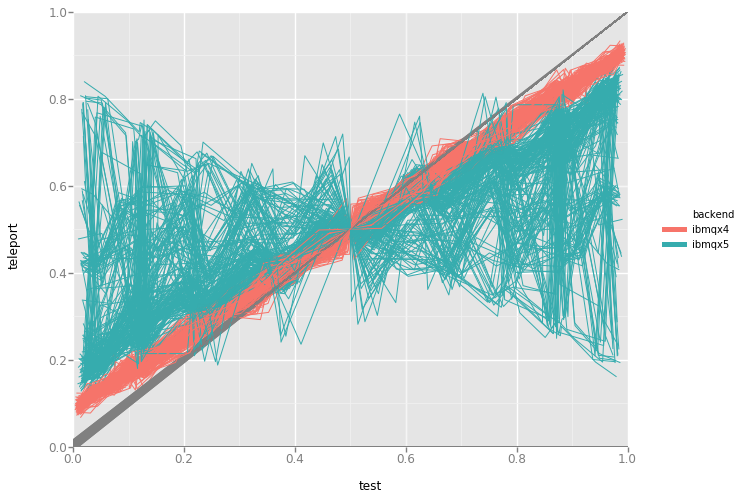

<ggplot: (96558426674)>

In [9]:
ggplot(aes(x='test',y='teleport',group='index',colour='backend'),data=obs_data)+\
geom_abline(1,0,color='gray')+geom_line()+\
xlim(0,1)+ylim(0,1)

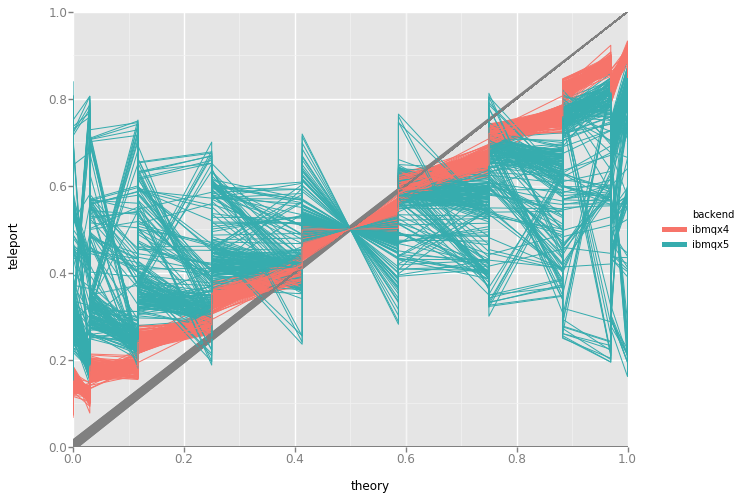

<ggplot: (96559067484)>

In [10]:
ggplot(aes(x='theory',y='teleport',group='index',colour='backend'),data=obs_data)+\
geom_abline(1,0,color='gray')+\
geom_line()+\
xlim(0,1)+ylim(0,1)

## Errors analysis

$ERROR=(\alpha-\cos^2\frac{\theta}{2})^2+(\beta-\sin^2\frac{\theta}{2})$

$ERROR_{test}$ for $\alpha$,$\beta$ measured on test circuits, $ERROR_{teleport}$ for $\alpha$,$\beta$ measured on teleportation circuits.

In [11]:
error_data=obs_data
error_data['error_test']=(error_data['test']-error_data['theory'])**2
error_data['error_teleport']=(error_data['teleport']-error_data['theory'])**2
error_data=error_data.groupby(['index','backend','theta','date']).agg({'error_test':'sum','error_teleport':'sum'})
error_data=error_data.reset_index()
error_data.head()

,index,backend,theta,date,error_test,error_teleport
0,0,ibmqx4,0.000000,2018-07-12T10:29:42.461Z,0.000231,0.016497
1,0,ibmqx4,0.349066,2018-07-12T10:29:42.677Z,0.000029,0.013820
2,0,ibmqx4,0.698132,2018-07-12T10:29:42.844Z,0.000034,0.006027
3,0,ibmqx4,1.047198,2018-07-12T10:29:43.041Z,0.001833,0.003862
4,0,ibmqx4,1.396263,2018-07-12T10:29:43.243Z,0.003221,0.000770


In [12]:
jobs_error=error_data.groupby(['index','backend']).agg({'error_test':'sum','error_teleport':'sum'}).reset_index()
jobs_error['error']=jobs_error['error_test']+jobs_error['error_teleport']
jobs_error.head()

,index,backend,error_test,error_teleport,error
0,0,ibmqx4,0.063612,0.164149,0.227761
1,1,ibmqx4,0.073571,0.200779,0.274350
2,2,ibmqx4,0.076823,0.201984,0.278807
3,3,ibmqx4,0.079350,0.186072,0.265422
4,4,ibmqx4,0.059723,0.177675,0.237398


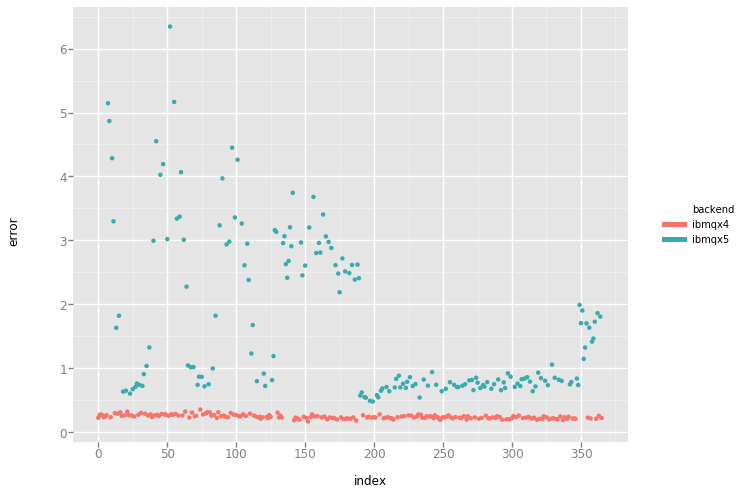

<ggplot: (96558426751)>

In [13]:
ggplot(aes(x='index',y='error',color='backend'),data=jobs_error)+geom_point()#+scale_x_datetime()

Observation: Error increases with $\theta$ - as we already know, state 0 is prefered, and the greater $\theta$, the greater $|\langle1|\psi\rangle|$

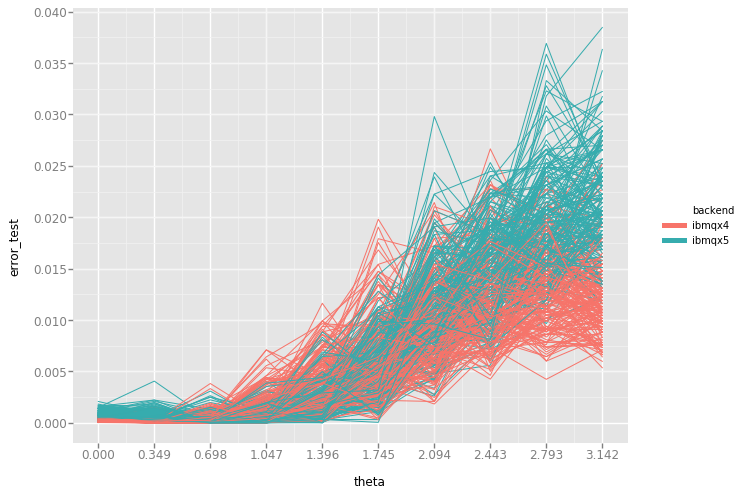

<ggplot: (-9223371940290441535)>

In [14]:
ggplot(aes(x='theta',y='error_test',group='index',colour='backend'),data=error_data)+\
geom_line()+ \
scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))

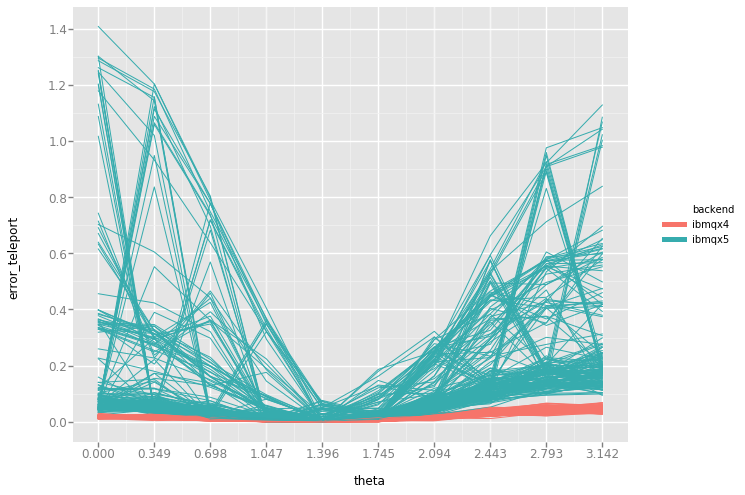

<ggplot: (-9223371940290372008)>

In [15]:
ggplot(aes(x='theta',y='error_teleport',group='index',colour='backend'),data=error_data)+\
geom_line()+ \
scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))

Are errors on test and teleportation circuits correlated?

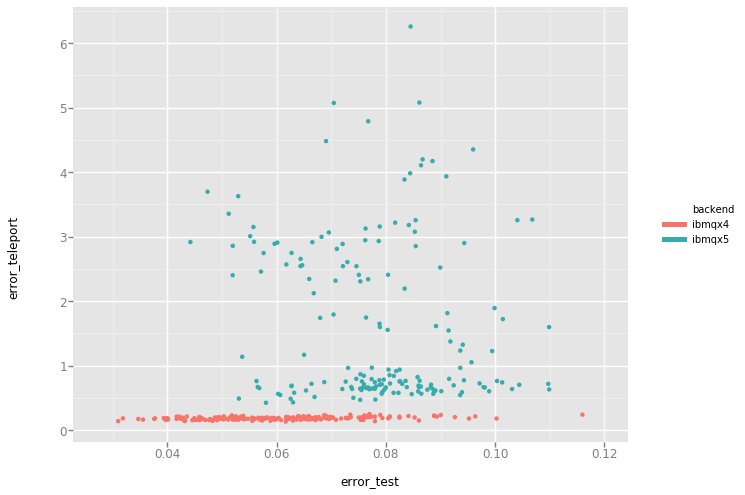

<ggplot: (-9223371940296571346)>

In [16]:
ggplot(aes(x='error_test',y='error_teleport',colour='backend'),
       data=jobs_error)+\
geom_point()